In [70]:
# Imports
import investpy
import pandas as pd
import seaborn as sb
import plotly.express as px
import matplotlib.pyplot as plt

# Import Wheat Data

In [71]:
wheat_df = investpy.get_commodity_historical_data(commodity = 'US Wheat',country = 'united states',
                                                  from_date = '01/01/2012',to_date = '01/01/2022')
wheat_df.head(5)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2012-01-02,653.13,653.13,653.13,653.13,0,USD
2012-01-03,665.88,670.50,654.00,658.38,0,USD
2012-01-04,656.38,661.13,645.63,650.13,0,USD
2012-01-05,649.13,650.13,627.13,627.38,0,USD
2012-01-06,629.38,636.88,624.63,624.63,0,USD


# Editing the Data to specify the Close price and giving the colum name a more specific name.

In [118]:
wheat_df = wheat_df.drop(['Open','High','Low','Volume','Currency'], axis=1)
wheat_df = wheat_df.rename(columns = {'Close': 'Wheat'})
wheat_df.head(5)

wheat_plt = plt.

,Wheat
Date,
2012-01-02,653.13
2012-01-03,658.38
2012-01-04,650.13
2012-01-05,627.38
2012-01-06,624.63


# Import Crude Data

In [73]:
crude_df = investpy.get_commodity_historical_data(commodity = 'Crude Oil WTI', country = 'united states',
                                                  from_date = '01/01/2012',to_date = '01/01/2022')
crude_df.head(5)

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2012-01-03,99.70,103.18,99.65,102.96,275481,USD
2012-01-04,102.99,103.74,101.88,103.22,271711,USD
2012-01-05,103.29,103.73,101.30,101.81,295615,USD
2012-01-06,101.35,102.80,100.88,101.56,290458,USD
2012-01-09,101.92,102.15,100.10,101.31,311866,USD


# Edit and clean data

In [74]:
crude_df = crude_df.drop(['Open','High','Low','Volume','Currency'],axis=1)
crude_df = crude_df.rename(columns = {'Close': 'Crude'})
crude_df.head(5)

,Crude
Date,
2012-01-03,102.96
2012-01-04,103.22
2012-01-05,101.81
2012-01-06,101.56
2012-01-09,101.31


# Import Carbon futures data

In [83]:
carbon_df = pd.read_csv("Data/Carbon Emissions Futures Historical Data.csv")
carbon_df.head(5)

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 02, 2022",81.98,80.33,82.19,79.87,11.33K,1.67%
1,"Aug 01, 2022",80.63,78.10,80.83,78.10,10.51K,2.49%
2,"Jul 29, 2022",78.67,78.96,79.50,77.57,11.48K,-0.04%
3,"Jul 28, 2022",78.70,76.07,80.10,76.07,14.23K,3.19%
4,"Jul 27, 2022",76.27,76.61,77.79,75.80,13.54K,-0.64%


In [84]:
pwd

'C:\\Users\\BlackGod\\Desktop\\NWU_Bootcamp\\Project_1'

# Edit Carbon data

In [85]:
#carbon_df = carbon_df.drop(['Open','High','Low','Vol.','Change %'], axis=1)
carbon_df.rename(columns={'Price':'Carbon Futures'})
carbon_df['Date'] = pd.to_datetime(carbon_df.Date)
carbon_df['Date'] = carbon_df['Date'].dt.strftime('%Y-%m-%d')

carbon_df.head(5)
#carbon_df.reset_index()

,Date,Price,Open,High,Low,Vol.,Change %
0,2022-08-02,81.98,80.33,82.19,79.87,11.33K,1.67%
1,2022-08-01,80.63,78.10,80.83,78.10,10.51K,2.49%
2,2022-07-29,78.67,78.96,79.50,77.57,11.48K,-0.04%
3,2022-07-28,78.70,76.07,80.10,76.07,14.23K,3.19%
4,2022-07-27,76.27,76.61,77.79,75.80,13.54K,-0.64%


In [86]:
carbon_df = carbon_df.set_index("Date")
carbon_df.head(5)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2022-08-02,81.98,80.33,82.19,79.87,11.33K,1.67%
2022-08-01,80.63,78.10,80.83,78.10,10.51K,2.49%
2022-07-29,78.67,78.96,79.50,77.57,11.48K,-0.04%
2022-07-28,78.70,76.07,80.10,76.07,14.23K,3.19%
2022-07-27,76.27,76.61,77.79,75.80,13.54K,-0.64%


In [87]:
crude_df = crude_df.rename(columns = {'Price': 'Carbon'})
crude_df.head(5)

,Crude
Date,
2012-01-03,102.96
2012-01-04,103.22
2012-01-05,101.81
2012-01-06,101.56
2012-01-09,101.31


In [89]:
#df1.index = pd.to_datetime(df1.index, format = '%m/%d/%Y').strftime('%Y-%m-%d')

crude_df.index = pd.to_datetime(crude_df.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
carbon_df.index = pd.to_datetime(carbon_df.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')
wheat_df.index = pd.to_datetime(wheat_df.index, format = '%Y-%m-%d').strftime('%Y-%m-%d')

In [90]:
crudecarbon = pd.merge(crude_df,carbon_df,on="Date", how='inner')
crudecarbon = crudecarbon.drop(['Open','High','Low','Vol.','Change %'],axis=1)
crudecarbon.rename(columns={'Price':'Carbon'}, inplace=True)
crudecarbon

,Crude,Carbon
Date,,
2012-01-03,102.96,6.28
2012-01-04,103.22,6.27
2012-01-05,101.81,6.43
2012-01-06,101.56,6.30
2012-01-09,101.31,11.00
...,...,...
2021-12-27,75.57,76.92
2021-12-28,75.98,79.29
2021-12-29,76.56,80.36


In [91]:
wheatcrudecarbon = pd.merge(crudecarbon,wheat_df, on='Date',how='inner')
wheatcrudecarbon

,Crude,Carbon,Open,High,Low,Wheat,Volume,Currency
Date,,,,,,,,
2012-01-03,102.96,6.28,665.88,670.50,654.00,658.38,0,USD
2012-01-04,103.22,6.27,656.38,661.13,645.63,650.13,0,USD
2012-01-05,101.81,6.43,649.13,650.13,627.13,627.38,0,USD
2012-01-06,101.56,6.30,629.38,636.88,624.63,624.63,0,USD
2012-01-09,101.31,11.00,625.75,644.88,625.25,642.38,0,USD
...,...,...,...,...,...,...,...,...
2021-12-27,75.57,76.92,817.50,824.00,802.50,804.00,0,USD
2021-12-28,75.98,79.29,805.75,808.00,781.75,783.50,0,USD
2021-12-29,76.56,80.36,785.25,793.00,774.00,787.75,0,USD


In [100]:
wheatcrudecarbon.drop(columns=['Open','High','Low','Volume','Currency'])
wheatcrudecarbon.rename(columns={'Price':'Carbon'}, inplace=True)

In [109]:
returns = wheatcrudecarbon.dropna()
returns = returns.drop(columns=['Open','High','Low','Volume','Currency'])
returns.head(5)

,Crude,Carbon,Wheat
Date,,,
2012-01-03,102.96,6.28,658.38
2012-01-04,103.22,6.27,650.13
2012-01-05,101.81,6.43,627.38
2012-01-06,101.56,6.30,624.63
2012-01-09,101.31,11.00,642.38


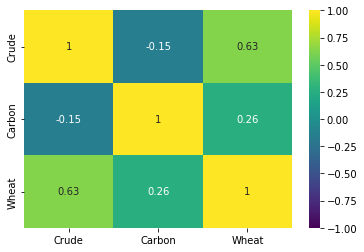

In [114]:
# Show correlation matrix
sb.heatmap(returns.corr(),cmap='viridis',annot=True,vmin=-1, vmax=1);

In [97]:
returns.reset_index(inplace=True)

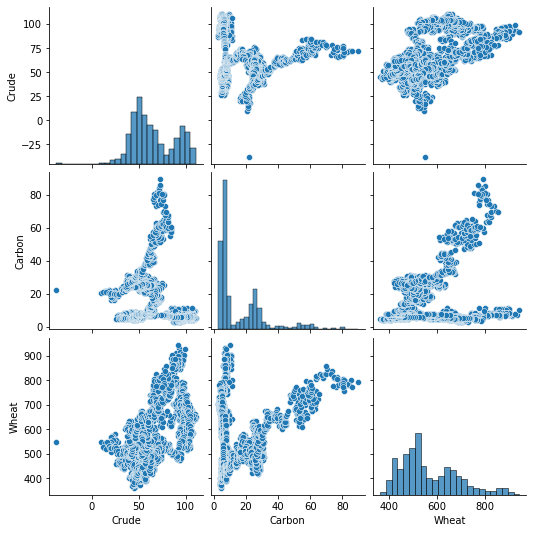

In [117]:
corrgram_ = sb.pairplot(returns)
corrgram_
